**Tunnel Traffic**

In [ ]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

simplefilter("ignore")  # ignore warnings to clean up output cells

# Set Matplotlib defaults
plt.style.use("ggplot")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# Load Tunnel Traffick dataset
tunnel = pd.read_csv("/content/tunnel.csv", parse_dates=['Day'])
tunnel = tunnel.set_index("Day").to_period()

<Axes: title={'center': 'Tunnel Traffic 365-Day Moving Average'}, xlabel='Day'>

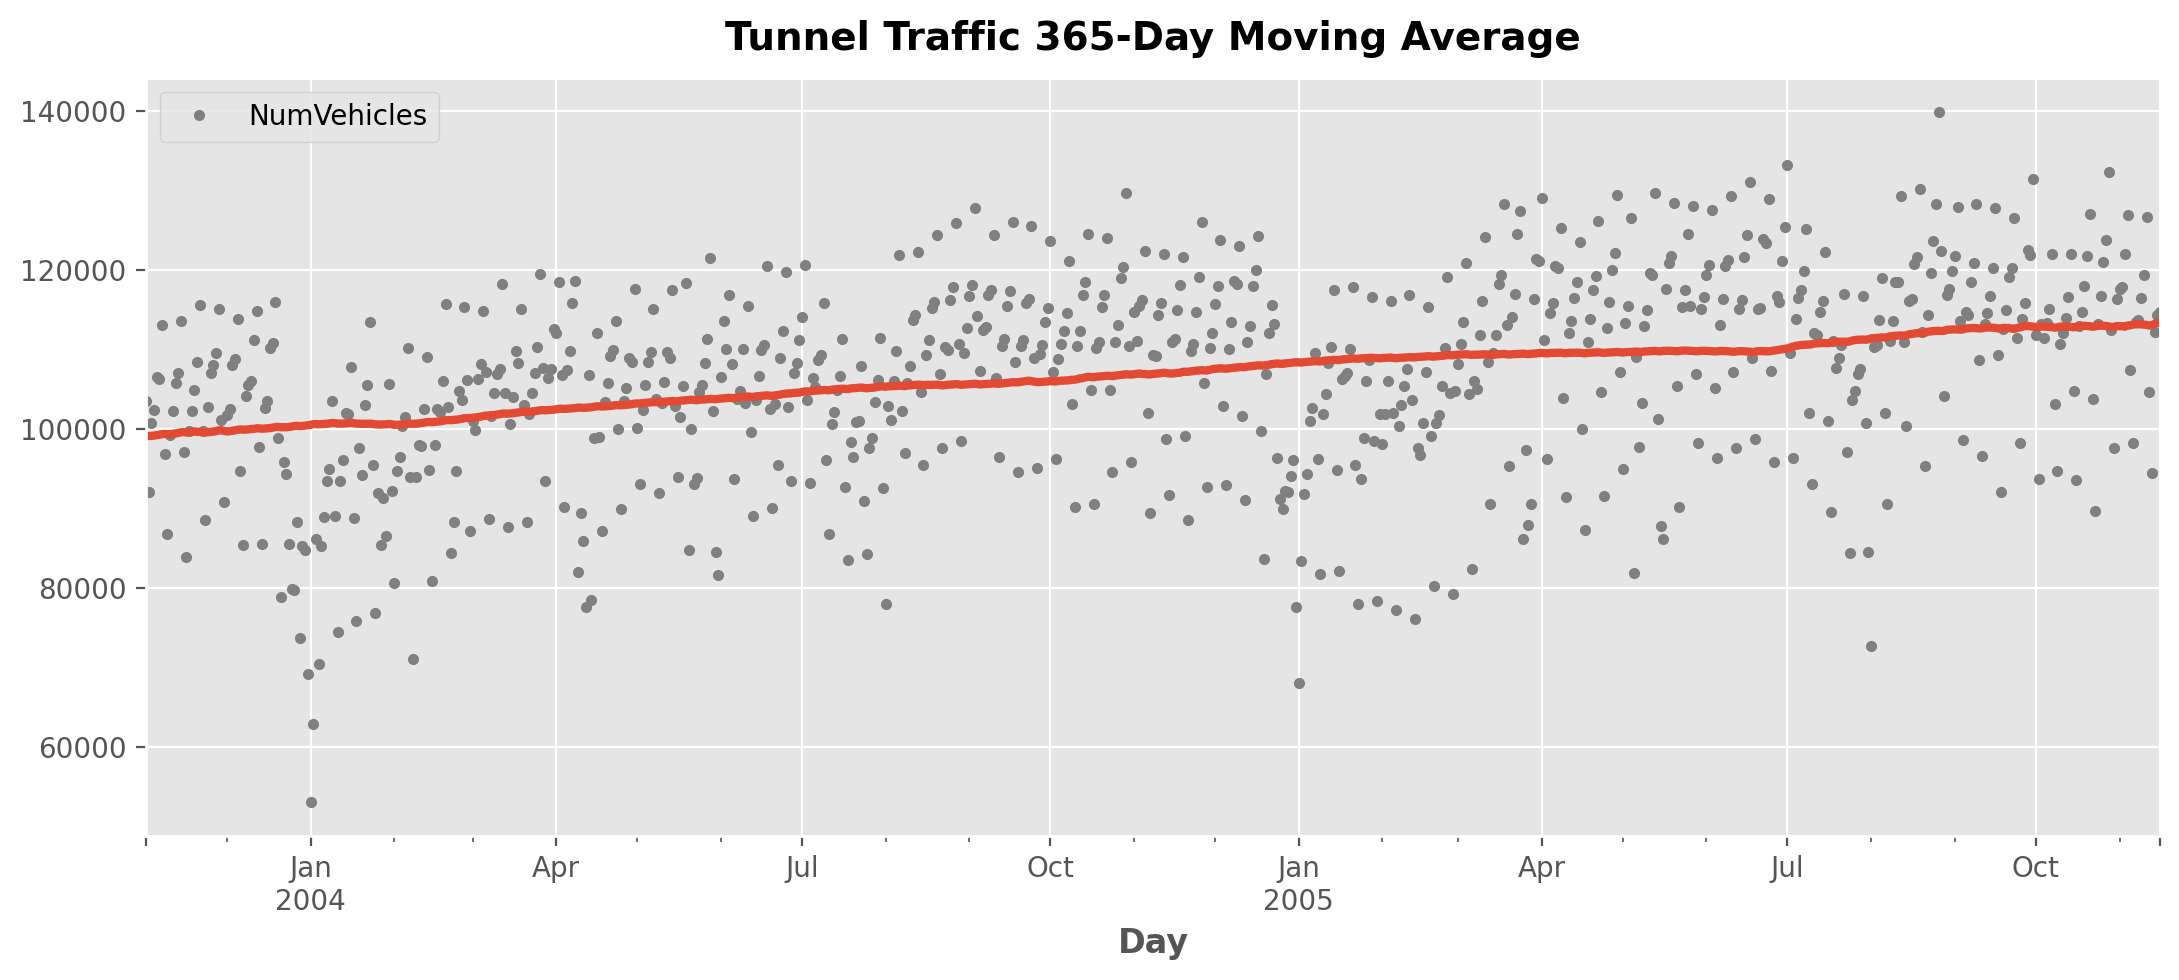

In [ ]:
moving_average = tunnel.rolling(
    window=365,   # 365 days window
    center=True,    # put the average at the center of the window
    min_periods = 138     # choose about half the window size
).mean()

ax = tunnel.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Tunnel Traffic 365-Day Moving Average", legend=False
)

In [ ]:
from statsmodels.tsa.deterministic import DeterministicProcess

dp = DeterministicProcess(
    index=tunnel.index,   # dates from the training data
    constant=True,     # dummy features for the bias
    order=1,
    drop=True
)
# 'in-sample' creates features for the data given in the index
X = dp.in_sample()
X.head()

,const,trend
Day,,
2003-11-01,1.0,1.0
2003-11-02,1.0,2.0
2003-11-03,1.0,3.0
2003-11-04,1.0,4.0
2003-11-05,1.0,5.0


In [ ]:
from sklearn.linear_model import LinearRegression

y = tunnel["NumVehicles"]   # the target

model = LinearRegression(fit_intercept=False)
model.fit(X, y)

LinearRegression(fit_intercept=False)

In [ ]:
y_pred = pd.Series(model.predict(X), index=X.index)

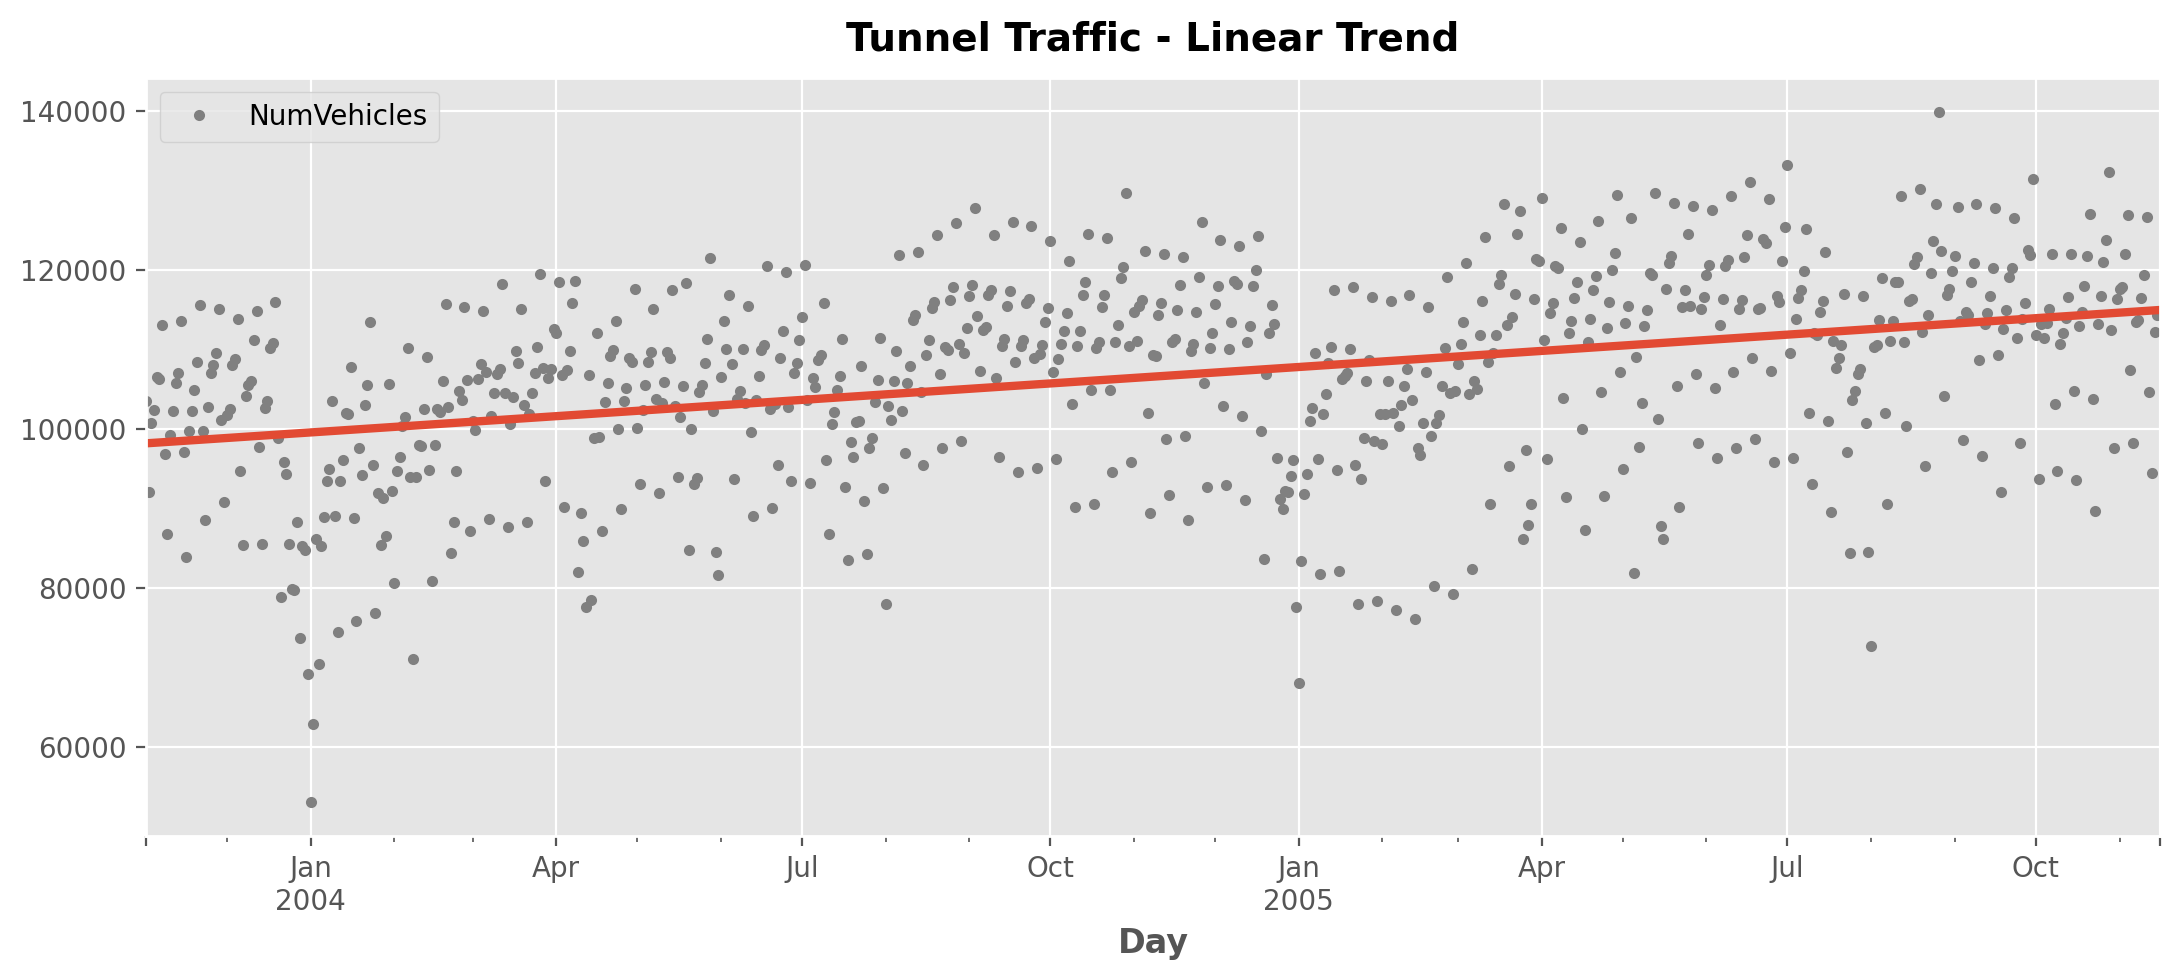

In [ ]:
ax = tunnel.plot(style=".", color="0.5", title="Tunnel Traffic - Linear Trend")
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

In [ ]:
X = dp.out_of_sample(steps=30)
y_fore = pd.Series(model.predict(X), index=X.index)
y_fore.head()

,0
2005-11-17,114981.801146
2005-11-18,115004.298595
2005-11-19,115026.796045
2005-11-20,115049.293494
2005-11-21,115071.790944


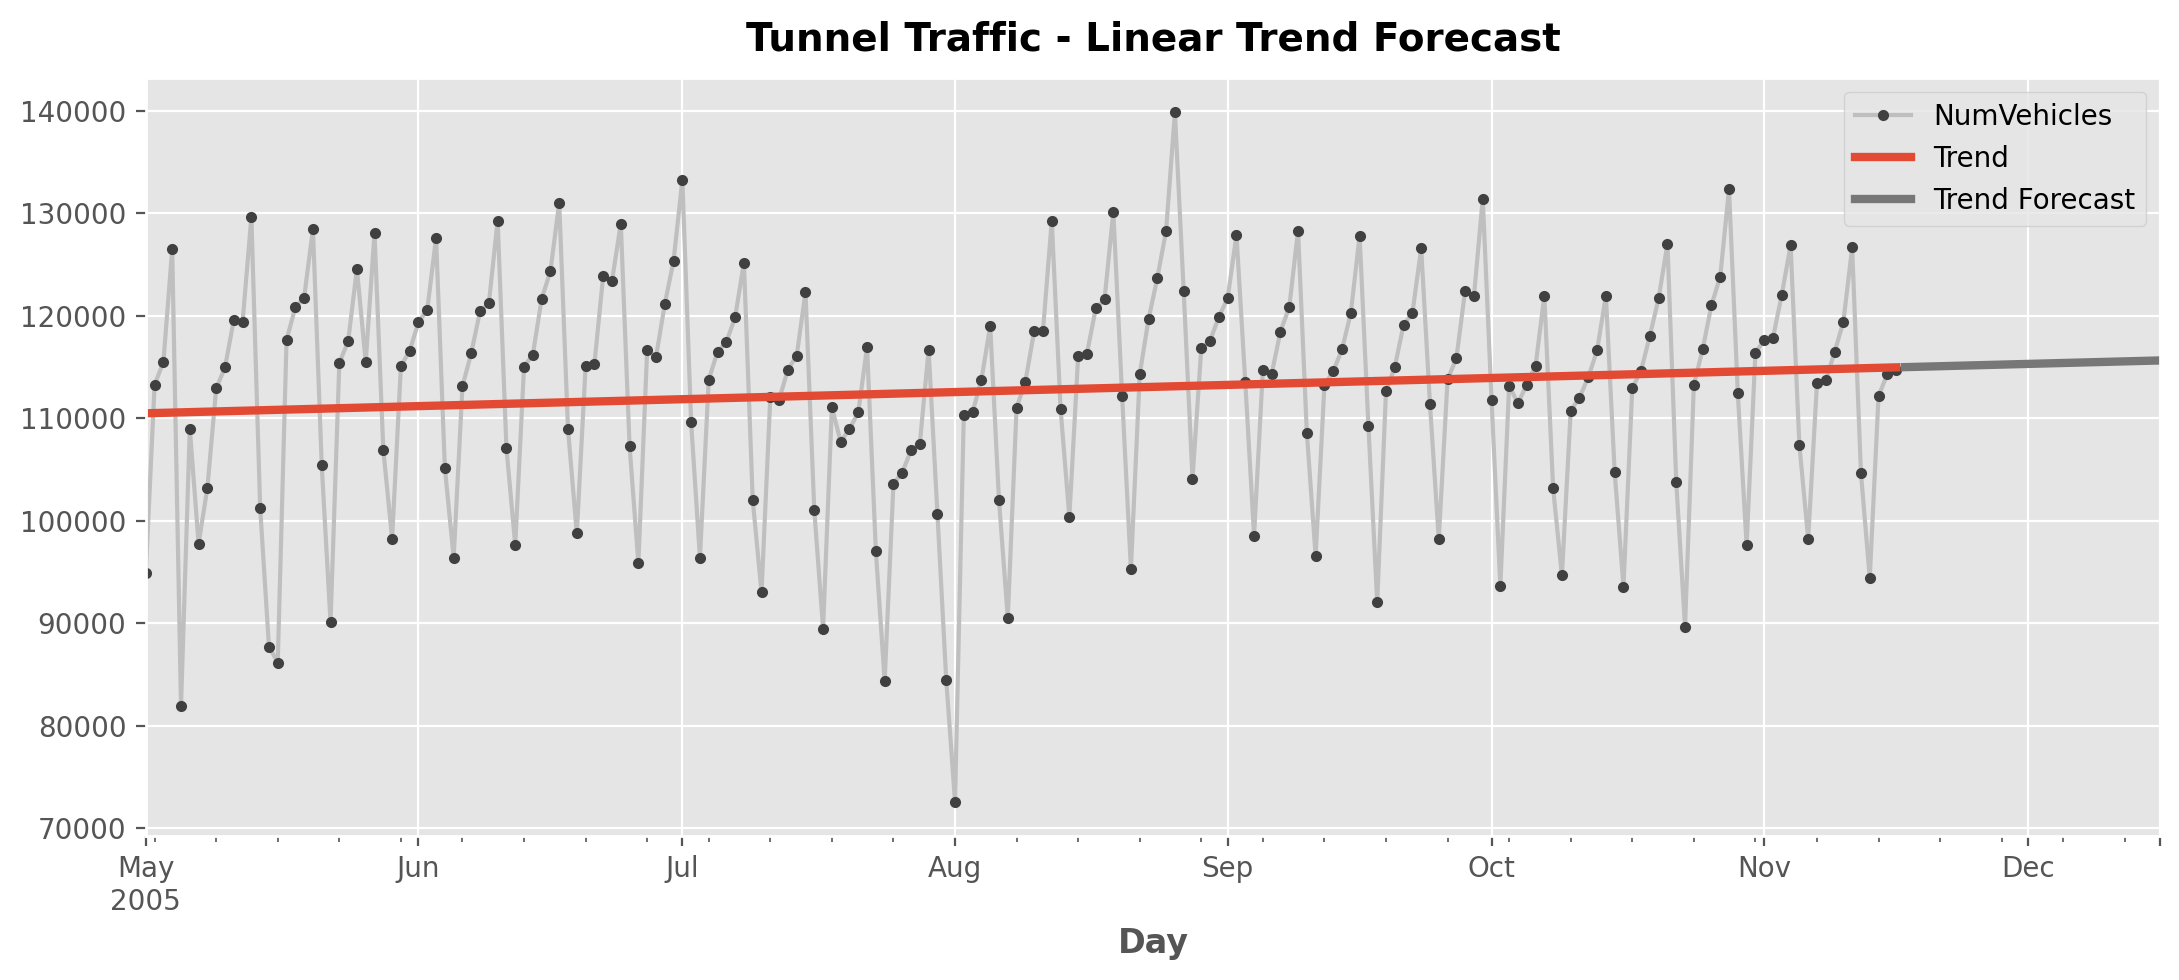

In [ ]:
ax = tunnel["2005-05":].plot(title="Tunnel Traffic - Linear Trend Forecast", **plot_params)
ax = y_pred["2005-05":].plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label="Trend Forecast", color="C3")
_ = ax.legend()

#In time series, in-sample data refers to the portion used to train the model, while out-of-sample data is used to test how well the model generalizes to unseen future data. This distinction helps ensure the model can make accurate predictions beyond the data it was trained on.